<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW4/MWrotCurve_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [1]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex
import pandas as pd
import numpy as np

In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$\frac{GMm}{r^2}=\frac{mv^2}{r}$ - Gravity equals centripetal force \\
$\frac{GM(r)}{r}=v^2$ - simplification \\
$v ∝ \frac{1}{\sqrt{r}}$


## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv")
m31.drop(0,inplace=True)
m31.rename(columns={"#M31":"r", "Grand":"v","Rotation":"dv","Curve":"err"},inplace=True)
m31=m31.astype(float)

In [3]:
m31.head()

,r,v,dv,err
1,0.100,183.939,0.000,0.000
2,0.120,190.710,10.265,12.191
3,0.144,204.141,22.634,21.808
4,0.173,207.601,4.573,4.200
5,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [4]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [5]:
m31.shape

(55, 4)

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [6]:
apparentSizeM31=3.167

In [7]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [8]:
m31Dis=765 * u.kpc
m31DisErr = 28 * u.kpc
m31Size=m31Dis*np.sin(m31angS)
m31SizeError=m31DisErr*np.sin(m31angS)
print("Distance from Andromeda: " + r"{:.0f} +/- {:2.1f}".format(m31Dis, m31DisErr))

Distance from Andromeda: 765 kpc +/- 28.0 kpc


In [9]:
...
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 42 kpc +/- 1.5 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [10]:
index=m31.r>=m31Size/2
rad=m31.r[index].iloc[0]
vel=m31.v[index].iloc[0]
print("the smallest radius is {} kpc".format(rad))
print("the corresponding velocity is {} km/s".format(vel))

the smallest radius is 23.738 kpc
the corresponding velocity is 236.511 km/s


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [11]:
# first measurement including all mass
def getradii(data,N,galaxy_size):
  index=data.r>=N*galaxy_size/2
  rad=data.r[index]
  vel=data.v[index]
  dv=data.dv[index]
  error=data.err[index]
  return rad.iloc[0],vel.iloc[0],dv.iloc[0],error.iloc[0]


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [12]:
import matplotlib.pylab as plt

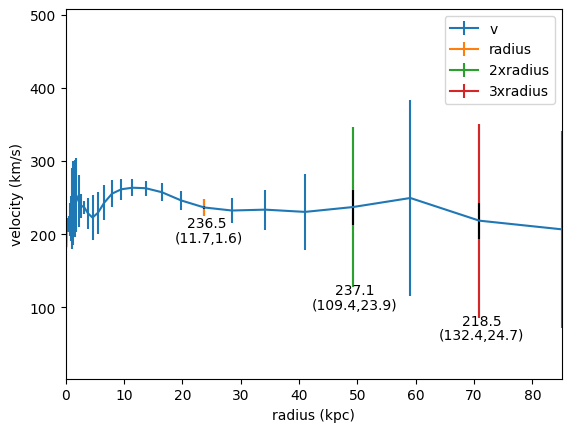

In [13]:
#delete leave plot
def plotGal(gal, rds):
    plt.errorbar(gal.r,gal.v,yerr=gal.dv,label='v')
    r,v,dv,err=getradii(gal,1,rds)
    plt.errorbar(r,v,yerr=dv,label="radius")
    plt.errorbar(r,v,yerr=err,color='black')
    plt.text(r-3,v-dv-15,v.round(1))
    plt.text(r-5,v-dv-35,"({},{})".format(dv.round(1),err.round(1)))
    r,v,dv,err=getradii(gal,2,rds)
    plt.errorbar(r,v,yerr=dv,label="2xradius")
    plt.errorbar(r,v,yerr=err,color='black')
    plt.text(r-3,v-dv-10,v.round(1))
    plt.text(r-7,v-dv-30,"({},{})".format(dv.round(1),err.round(1)))
    r,v,dv,err=getradii(gal,3,rds)
    plt.errorbar(r,v,yerr=dv,label="3xradius")
    plt.errorbar(r,v,yerr=err,color='black')
    plt.text(r-3,v-dv-10,v.round(1))
    plt.text(r-7,v-dv-30,"({},{})".format(dv.round(1),err.round(1)))
    plt.xlim([0,85])
    plt.xlabel("radius (kpc)")
    plt.ylabel("velocity (km/s)")
    plt.legend()

plotGal(m31, m31Size)
#m31, m31Rds

## Figure(1): rotation velocity versus radius of M31. The orange, green, and red line show where the 1X, 2X, and 3X the luminous radius is, with the error using dv. Black line shows the same but using total error instead.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [14]:
#delete
def vratios(data,r_lu,N,err='dv'):
  index=data.r>=N*r_lu/2
  rad=data.r[index].iloc[0]
  index=data.r[rad==data.r].index
  vel=data.v[index].iloc[0]
  dv=data.dv[index].iloc[0]
  error=data.err[index].iloc[0]
  print("- the minimum radius passes the threshold is {} kpc, with corresponding velocity {} km/s".format(rad,vel))
  rat_exp=np.sqrt(data.r[index-1].iloc[0]/rad )
  print("- the expected ratio based on the radii is {}".format(rat_exp))
  if err=='dv':
    v_err=vel/data.v[index-1].iloc[0]*np.sqrt( (dv/vel)**2 + (data.dv[index-1].iloc[0]/data.v[index].iloc[0])**2 )
  else:
    v_err=vel/data.v[index-1].iloc[0]*np.sqrt( (error/vel)**2 + (data.err[index-1].iloc[0]/data.v[index].iloc[0])**2 )
  rat_cal=vel/data.v[index-1].iloc[0]
  print("- the calculated ratio is {}, and its uncertainty {}".format(rat_cal,v_err))
  print("- the 2 sigma upper and lower limits of the calculated ratio {},{}".format(rat_cal+2*v_err,rat_cal-2*v_err))
  if rat_exp >= rat_cal-v_err and rat_exp <= rat_cal+v_err:
    print("the expected ration is within 2 sigma of the calculated ratio")
  else:
    print("the expected ration is not within 2 sigma of the calculated ratio")


In [15]:
m31Rds=m31Size
vratios(m31, m31Rds, 1)
print()
vratios(m31, m31Rds, 1, err='err')

- the minimum radius passes the threshold is 23.738 kpc, with corresponding velocity 236.511 km/s
- the expected ratio based on the radii is 0.9128555466052115
- the calculated ratio is 0.9608799869992688, and its uncertainty 0.0724903211117977
- the 2 sigma upper and lower limits of the calculated ratio 1.1058606292228643,0.8158993447756734
the expected ration is within 2 sigma of the calculated ratio

- the minimum radius passes the threshold is 23.738 kpc, with corresponding velocity 236.511 km/s
- the expected ratio based on the radii is 0.9128555466052115
- the calculated ratio is 0.9608799869992688, and its uncertainty 0.010320067005536303
- the 2 sigma upper and lower limits of the calculated ratio 0.9815201210103414,0.9402398529881962
the expected ration is not within 2 sigma of the calculated ratio


In [16]:
vratios(m31, m31Rds, 2)

- the minimum radius passes the threshold is 49.222 kpc, with corresponding velocity 237.069 km/s
- the expected ratio based on the radii is 0.9128783475428361
- the calculated ratio is 1.0287488500459983, and its uncertainty 0.526368513459976
- the 2 sigma upper and lower limits of the calculated ratio 2.0814858769659503,-0.023988176873953826
the expected ration is within 2 sigma of the calculated ratio


In [17]:
vratios(m31, m31Rds, 2, err='err')

- the minimum radius passes the threshold is 49.222 kpc, with corresponding velocity 237.069 km/s
- the expected ratio based on the radii is 0.9128783475428361
- the calculated ratio is 1.0287488500459983, and its uncertainty 0.11221415902633156
- the 2 sigma upper and lower limits of the calculated ratio 1.2531771680986614,0.8043205319933351
the expected ration is not within 2 sigma of the calculated ratio


### Discuss!

Whether the velocity drop with increasing radius can be explained by Newtonian gravity is dependent on the one uses. If the velocity drop can indeed be explained within the current framework of physics, the need of searching for dark matter disappears.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [18]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv")
mw.drop(0,inplace=True)
mw.rename(columns={"#MW":"r", "Grand":"v","Rotation":"dv","Curve":"err"},inplace=True)
mw.head()

,r,v,dv,err
1,0.010,119.061,41.832,32.714
2,0.012,115.268,35.199,17.100
3,0.014,117.392,35.152,14.429
4,0.017,118.475,35.252,14.870
5,0.021,110.386,33.817,14.427


In [19]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [20]:
m31.shape

(55, 4)

In [21]:
mwSize=26.8
mw=mw.astype(float)
index=mw.r>=mwSize/2
rad=mw.r[index].iloc[0]
vel=mw.v[index].iloc[0]
print("the smallest radius is {} kpc".format(rad))
print("the corresponding velocity is {} km/s".format(vel))

the smallest radius is 14.698 kpc
the corresponding velocity is 247.075 km/s


https://en.wikipedia.org/wiki/Milky_Way
    

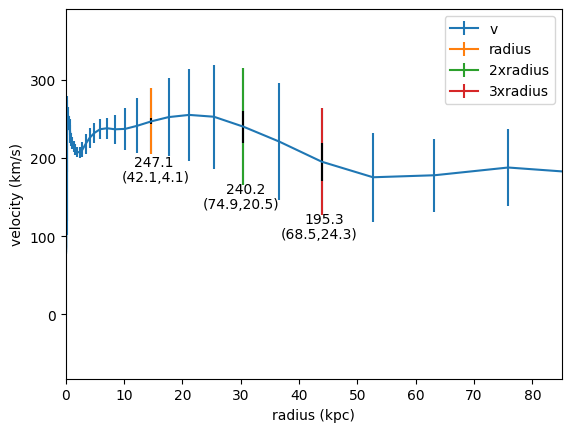

In [22]:
plotGal(mw, mwSize)

## Figure(1): rotation velocity versus radius of MW. The orange, green, and red line show where the 1X, 2X, and 3X the luminous radius is, with the error using dv. Black line shows the same but using total error instead.

In [23]:
mwRds=mwSize
vratios(mw, mwRds, 1)
print()
vratios(mw, mwRds, 1, err='err')

- the minimum radius passes the threshold is 14.698 kpc, with corresponding velocity 247.075 km/s
- the expected ratio based on the radii is 0.9128585073880934
- the calculated ratio is 1.0237758818581486, and its uncertainty 0.22805562124985146
- the 2 sigma upper and lower limits of the calculated ratio 1.4798871243578515,0.5676646393584457
the expected ration is within 2 sigma of the calculated ratio

- the minimum radius passes the threshold is 14.698 kpc, with corresponding velocity 247.075 km/s
- the expected ratio based on the radii is 0.9128585073880934
- the calculated ratio is 1.0237758818581486, and its uncertainty 0.02035666686375257
- the 2 sigma upper and lower limits of the calculated ratio 1.0644892155856538,0.9830625481306434
the expected ration is not within 2 sigma of the calculated ratio


In [24]:
vratios(mw, mwRds, 2)

- the minimum radius passes the threshold is 30.477 kpc, with corresponding velocity 240.165 km/s
- the expected ratio based on the radii is 0.9128799149655741
- the calculated ratio is 0.9493963615663764, and its uncertainty 0.3966472631370844
- the 2 sigma upper and lower limits of the calculated ratio 1.7426908878405452,0.15610183529220756
the expected ration is within 2 sigma of the calculated ratio


In [25]:
vratios(mw, mwRds, 2, err='err')

- the minimum radius passes the threshold is 30.477 kpc, with corresponding velocity 240.165 km/s
- the expected ratio based on the radii is 0.9128799149655741
- the calculated ratio is 0.9493963615663764, and its uncertainty 0.0995324956562378
- the 2 sigma upper and lower limits of the calculated ratio 1.148461352878852,0.7503313702539008
the expected ration is within 2 sigma of the calculated ratio


## Discussion:
It seems for our Milky way, 2 times the luminous radius should indeed contain all matters.